# Свёрточные сети для классификации фруктов

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.0005)


def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                     #  height_shift_range=0.2, 
                                     #  vertical_flip=True, 
                                     #  horizontal_flip=True,
                                     #  rotation_range=90,
                                     #  width_shift_range=0.2, 
                                      rescale=1./255)

    train_datagen_flow = train_datagen.flow_from_directory(
        path + '/',
        target_size=(150, 150),
        batch_size=16,
        class_mode='sparse',
        subset='training',
        seed=12345)

    return train_datagen_flow 


def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same',activation="relu", input_shape=input_shape))
    model.add(AvgPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=16, kernel_size=(5,5),activation="relu"))
    model.add(AvgPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=1,
               steps_per_epoch=None, validation_steps=None):
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

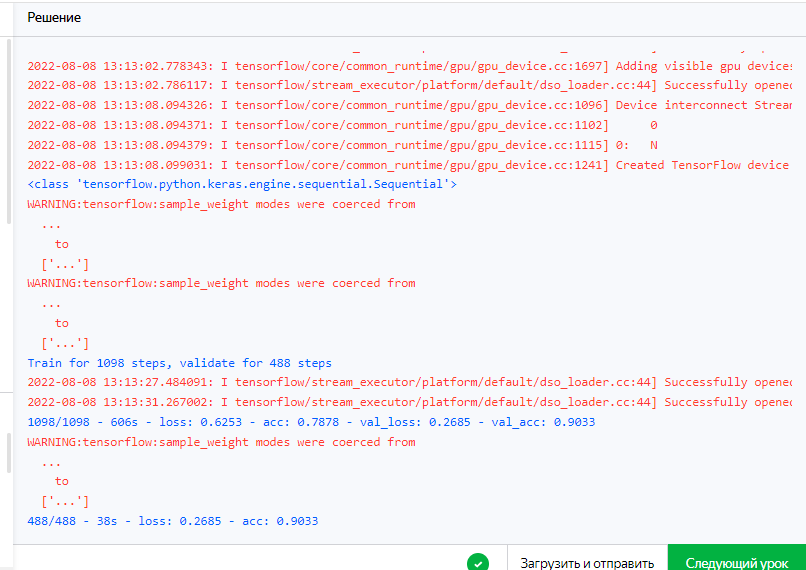